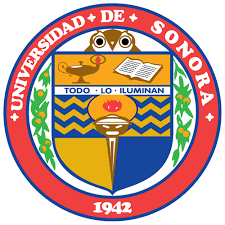



# **Actividad 8**

*Solución de Ecuaciones Diferenciales Ordinarias con Python.*

Iveth Rocio Navarro Lopez



---

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt



---

**Actividad 8.1**

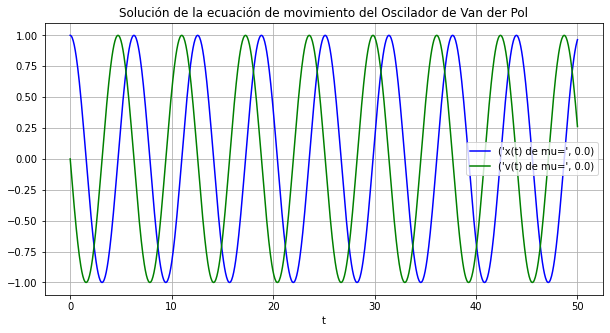

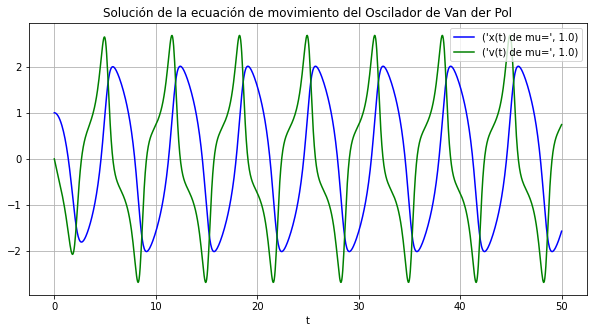

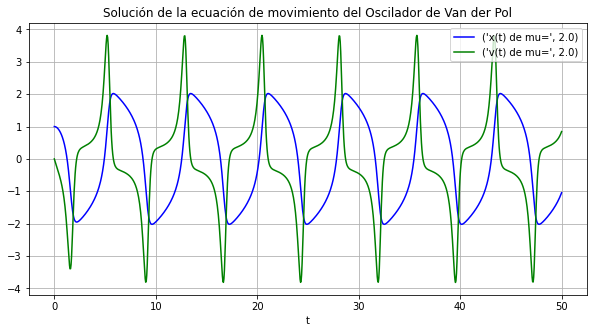

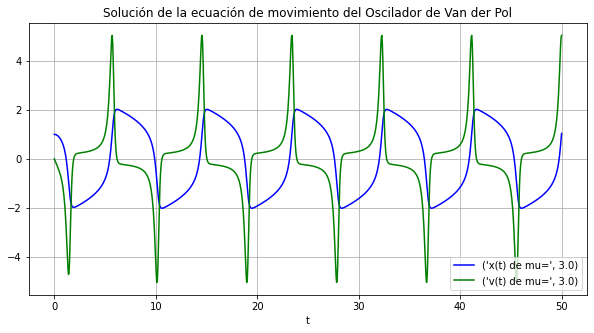

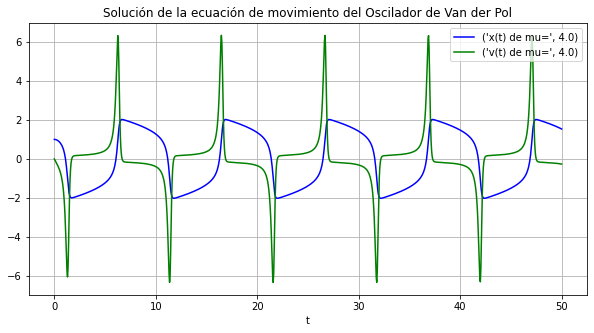

In [3]:
#from scipy.integrate import odeint


def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

#Condiciones iniciales x(0)=1, v(0)=0
y0 = [1.0,0.0]

# Definiendo el tiempo de integración de 0 a 50 segundos 
t = np.linspace(0, 50, 1000)

abserr = 1.0e-8
relerr = 1.0e-6

#Para μ=0
mu1 = [0.0,1.0,2.0,3.0,4.0]

for mu in mu1:

# Usamos el método de integración de scipy.integrate.odeint
  y = odeint(VanderPol, y0, t, args=(mu,), atol=abserr, rtol=relerr)



  plt.figure(figsize=(10,5))
  plt.plot(t, y[:, 0], 'b', label=('x(t) de mu=',mu))
  plt.plot(t, y[:, 1], 'g', label=('v(t) de mu=',mu))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del Oscilador de Van der Pol')
  plt.xlabel('t')
  plt.grid()
  plt.show()



---

**Actividad 8.2**

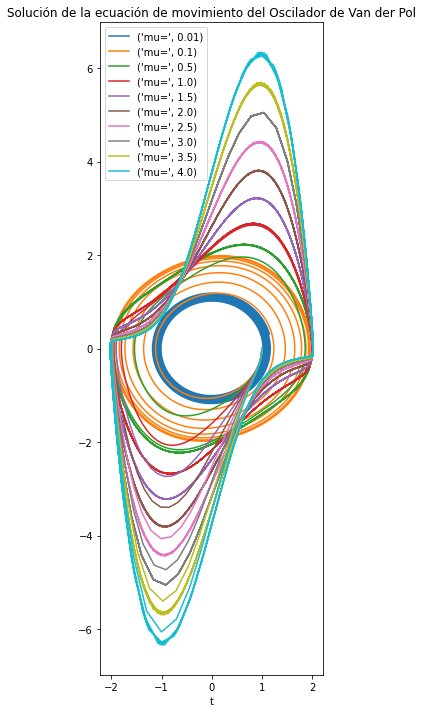

In [4]:
#from scipy.integrate import odeint

def VanderPol(y,t,mu):
        x, v = y
        dydt = [v, mu*(1 - x**2)*v - x]
        return dydt

#Condiciones iniciales x(0)=1, v(0)=0
y0 = [1.0,0.0]

# Definiendo el tiempo de integración de 0 a 50 segundos 
t = np.linspace(0, 50, 1000)

abserr = 1.0e-8
relerr = 1.0e-6

plt.figure(figsize=(4,12))

#Para μ=0
mu1 = [0.01,0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]

for mu in mu1:

# Usando el método de integración de scipy.integrate.odeint
  y = odeint(VanderPol, y0, t, args=(mu,), atol=abserr, rtol=relerr)

  plt.plot( y[:, 0], y[:, 1], label=('mu=',mu))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del Oscilador de Van der Pol')
  plt.xlabel('t')
  plt.grid()
plt.show()



---
**Actividad 8.3.1**




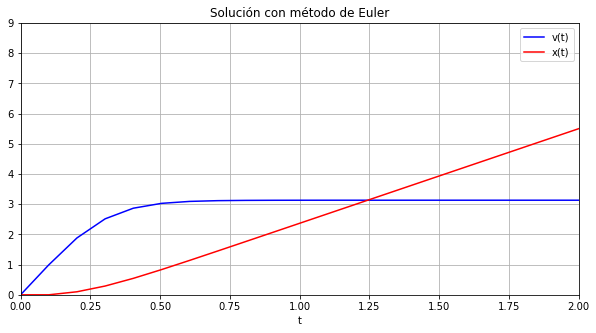

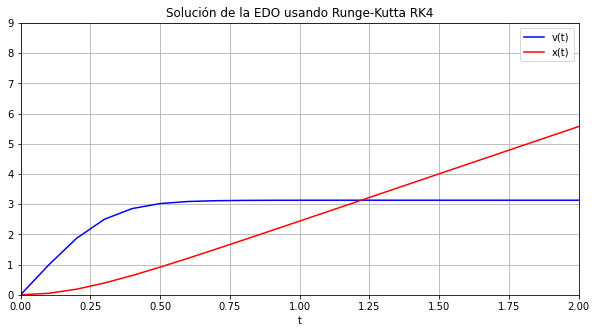

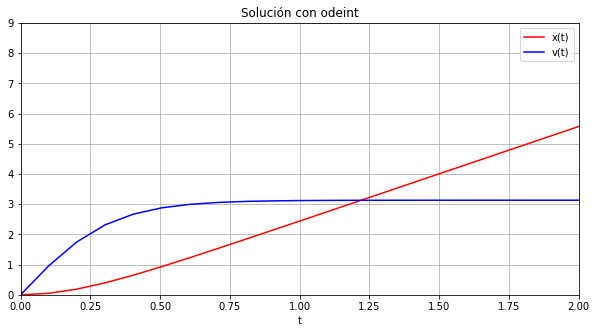

In [5]:
def Ej3(y,t,k,g):
        x, v = y
        dydt = [v, -k*v**2 +g]
        return dydt

k = 1.0
g = 9.81
x_0 = 0.0
v_0 = 0.0

# Definiendo el tiempo de integración de 0 a 50 segundos 
t = np.linspace(0, 10, 100)

#----------------------------------------------------------------
#Solución con método de Euler
f = lambda v,t: -k*v**2 + g

#Para f1t
v = np.zeros(len(t))
v[0] = v_0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])


#Para f2t
x = np.zeros(len(t))
x[0] = x_0
    
for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])


plt.figure(figsize=(10,5))
plt.plot(t,v,'b-', t,x,'r-')
plt.legend(['v(t)', 'x(t)'])
plt.axis([0,2,0,9])
plt.grid()
plt.title('Solución con método de Euler')
plt.xlabel('t')
plt.show()

#----------------------------------------------------------------

#Solución con Runge-Kutta RK4
# Tomada la versión de Joshua Simon
# https://github.com/JoshuaSimon/Classic-Fourth-Order-Runge-Kutta-Method-RK4/blob/master/Four_Step_Runge_Kutta_ODE1.py

#from datetime import datetime
#import matplotlib.pyplot as plt
#from math import exp, sqrt 


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

#---------------------------------------------------------------------

#Runge-Kutta RK4
# Condiciones iniciales
t_0 = 0.0

k = 1
g = 9.81

v1=0
t=0

# Paso de integración h = (b-a)/Npts
a=0.0
b=10.0
Npts=100
h = (b-a)/Npts




f = lambda v,t: -k*v1**2 + g
t_values = [t_0]
v_values = [v_0]

for _ in range(Npts):
  t, v1 = runge_kutta(f, t, v1, h)
  t_values.append(t)
  v_values.append(v1)


#Para la segunda ecuación 
#Solve_ivp


# Definimos la parte derecha de la ecuación

def P2(t,y,k,g):
        dydt = [y[1], -k*(y[1])**2 +g]
        return dydt


# Condiciones iniciales
y_0 = [x_0, v_0]

# Los puntos de t donde será evaluada la solución. #t=np.linspace(t0,tmax,Npts)
#ya tenemos definido b arriba y es tmax
t = np.linspace(t_0,b,Npts)

abserr = 1.0e-8
relerr = 1.0e-6


sol = solve_ivp(lambda t, y, mu: P2(t, y, k, g), (t_0,b), y0=y_0, 
                method='RK45', t_eval=t, args= (mu,), rtol=relerr, atol=abserr)
# El resultado de la función solve_ip contiene diversa información. 
# La infomación de interés es la solución numérica 'sol.y[0]'

xp2 = sol.y[0]



# Graficar la solución
plt.figure(figsize=(10,5))
#primera, calculada con RK4
plt.plot(t_values, v_values, 'b', label='v(t)')
#segunda, calculada con solve_ivp
plt.plot(t, xp2, 'r', label='x(t)')
plt.axis([0,2,0,9])
plt.legend(loc='best')
plt.title('Solución de la EDO usando Runge-Kutta RK4')
plt.xlabel('t')
plt.grid()
plt.show()

#------------------------------------------------------------------
#Solución con Odeint
#ya está definida la función arriba
y = odeint(Ej3, y_0, t, args=(k,g), atol=abserr, rtol=relerr)

plt.figure(figsize=(10,5))
plt.plot(t, y[:,0], 'r', label='x(t)')
plt.plot(t, y[:,1], 'b', label='v(t)')
plt.axis([0,2,0,9])
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()



---

**Actividad 8.3.2**




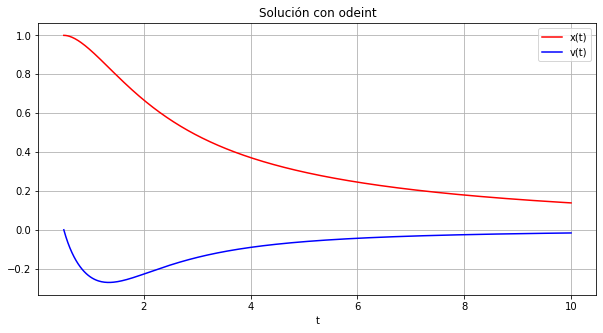

In [6]:
#Solución con odeint

def Ej32(z,x):
        y, v = z
        dzdx = [v, (-2/x)*v - y**5]
        return dzdx

x0 = 0.5
v0 = 0.0
y0 = 1.0

z0  = [y0, v0]

# Definiendo el tiempo de integración de 0 a 50 segundos #t=np.linspace(t0,tmax,Npts)
x = np.linspace(0.5, 10, 500)

z = odeint(Ej32, z0, x, atol=abserr, rtol=relerr )

plt.figure(figsize=(10,5))
plt.plot(x, z[:,0], 'r', label='x(t)')
plt.plot(x, z[:,1], 'b', label='v(t)')
#plt.axis([0,2,0,9])
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()



---
**Actividad 8.3.3**


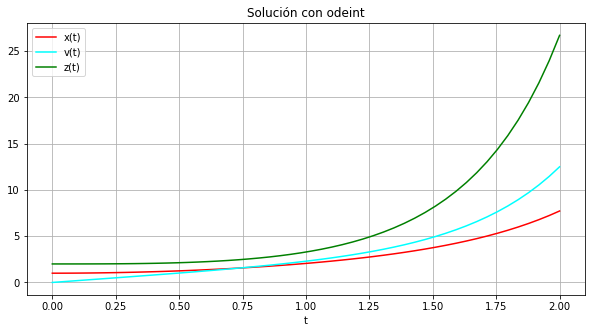

In [7]:
#Solución con odeint

def Ej33(w,x):
        y, v , z = w
        dwdx = [v, z, (x-1)**2 + y**2 + v - 2]
        return dwdx

x0 = 0.0
v0 = 0.0
y0 = 1.0
z0 = 2.0

w0  = [y0, v0, z0]

# Definiendo el tiempo de integración de 0 a 50 segundos #t=np.linspace(t0,tmax,Npts)
x = np.linspace(0.0, 2.0, 50)

w = odeint(Ej33, w0, x, atol=abserr, rtol=relerr )

plt.figure(figsize=(10,5))
plt.plot(x, w[:,0], 'r', label='x(t)')
plt.plot(x, w[:,1], 'cyan', label='v(t)')
plt.plot(x, w[:,2], 'g', label='z(t)')
#plt.axis([0,2,0,9])
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()